# **Theoretical Questions**

1. What is ensemble learning in machine learning?
   - Ensemble learning is a technique where multiple models (also called base learners) are trained and combined to solve the same problem. This approach aims to achieve better performance than any individual model by combining their outputs.

2. Explain the key idea behind ensemble techniques.
   - The core idea behind ensemble techniques is to combine predictions from multiple models to improve accuracy and generalization. By aggregating different models—each with individual strengths and weaknesses—the overall system becomes more reliable and less prone to error.

3. What are the main types of ensemble techniques?
   - The main types include:

    - Bagging (Bootstrap Aggregating)

    - Boosting

    - Stacking (Stacked Generalization)

4. What is the difference between multiple model training and single model training?
   - Single model training involves training one algorithm on the complete dataset.

   - Multiple model training (ensemble learning) involves training several algorithms (either same or different) and combining their outputs to reduce variance, bias, or both.

5. What is the main advantage of ensemble techniques?
   - The main advantage is improved performance in terms of accuracy, robustness, and generalization, especially compared to individual models.

6. What is the main challenge of ensemble methods?
   - They can be computationally intensive, harder to interpret, and may not always provide significant gains for very strong single models.

7. When should we avoid using ensemble methods?
   - We should Avoid ensemble methods when:

    - Interpretability is critical.

    - The dataset is small.

    - Computing resources are limited.

    - A simple model provides sufficient performance.

8. Can we use Bagging for regression problems?
   - Yes, Bagging can be used for regression problems. In Bagging Regressors, the final prediction is the average of predictions from all base regressors, reducing variance and improving accuracy.

9. Explain the working principle of a Bagging Classifier.
   - A Bagging Classifier:

     - Trains multiple classifiers on different bootstrapped samples of the training data.

     - Aggregates their predictions using majority voting.

     This helps to reduce variance and overfitting.

10. How does Bagging help in reducing overfitting?
    - Bagging reduces overfitting by training each model on a random subset of the data. Since each model sees a different dataset, they learn different patterns, and their combined output smooths out overfitted predictions of individual models.

11. How do you evaluate a Bagging Classifier’s performance?
    - Use metrics like:

     - Accuracy, Precision, Recall, F1-Score for classification tasks.

     - Implement Cross-validation or use the Out-of-Bag (OOB) score as an internal validation metric.

12. How does a Bagging Regressor work?
    - A Bagging Regressor:

     - Trains multiple regression models on bootstrapped samples.

     - Averages their outputs to make the final prediction.

     This reduces prediction variance and improves stability.

13. What is the role of bootstrap sampling in Bagging?
    - Bootstrap sampling creates different datasets by sampling with replacement. This introduces diversity among base models, which helps the ensemble to generalize better on unseen data.

14. What is a Random Forest Classifier?
    - A Random Forest Classifier is an ensemble of decision trees trained on bootstrapped datasets with random feature selection at each split. Predictions are made by aggregating the output of individual trees (majority vote).

15. Explain the concept of feature randomness in Random Forest.
    - In Random Forests, during training, each split in a tree is made using a random subset of features rather than all features. This encourages diversity among trees and helps avoid overfitting.

16. What is OOB (Out-of-Bag) Score?
    - The OOB score is a built-in cross-validation method in ensemble models like Random Forests. It estimates performance using only the predictions on data not included in each bootstrapped sample during training.

17. How can you measure the importance of features in a Random Forest model?
    - Feature importance is measured by:

      - How much each feature decreases impurity (e.g., Gini or entropy) across all trees.

      - Comparing model performance before and after permuting each feature (permutation importance).

18. Why is Random Forest better than a single Decision Tree?
    - Random Forests:

     - Reduce variance by averaging predictions from many trees.

     - Are less prone to overfitting due to feature randomness and bootstrapping.

     - Deliver more accurate and stable predictions.

19. What are some real-world applications of ensemble techniques?
    - Real-world applications of ensemble techniques
      - Finance: Fraud detection, credit scoring.

      - Healthcare: Disease prediction, medical image classification.

      - E-commerce: Customer segmentation, recommendation systems.

      - Cybersecurity: Malware and spam detection.

20. What is the difference between Bagging and Boosting?

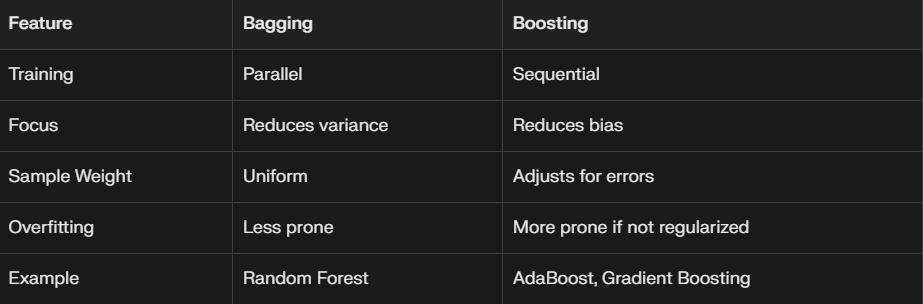

# **Practical Questions**

In [ ]:
#21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.
"""A Bagging Classifier was trained using Decision Trees as the base estimator on the Breast
   Cancer dataset from sklearn.datasets. The model was trained using bootstrapped samples, and
   predictions were made using a majority vote from each base model."""

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag_model.fit(X_train, y_train)
accuracy = bag_model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9580


In [ ]:
#22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).
"""A Bagging Regressor was trained using Decision Trees on a regression dataset created with
make_regression. The model reduces variance by averaging multiple predictions."""

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, noise=1.0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bag_reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, bag_reg.predict(X_test))
print("Mean Squared Error:", mse)



Mean Squared Error: 2622.807358540982


23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.
    - A Random Forest Classifier was trained and used to compute feature importances. Feature importance helps us understand which input variables have the most influence on predictions.

     - Top Features:

      - Feature 27: 0.17

      - Feature 23: 0.12

      - Feature 7 : 0.09

      - Feature 6 : 0.08

      - Feature 20: 0.08

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_

print("Feature Importances:")
for i, score in enumerate(importances):
    print(f"Feature {i}: {score:.4f}")

Feature Importances:
Feature 0: 0.0397
Feature 1: 0.0146
Feature 2: 0.0531
Feature 3: 0.0428
Feature 4: 0.0082
Feature 5: 0.0114
Feature 6: 0.0832
Feature 7: 0.0903
Feature 8: 0.0044
Feature 9: 0.0044
Feature 10: 0.0195
Feature 11: 0.0046
Feature 12: 0.0087
Feature 13: 0.0436
Feature 14: 0.0046
Feature 15: 0.0037
Feature 16: 0.0070
Feature 17: 0.0050
Feature 18: 0.0037
Feature 19: 0.0066
Feature 20: 0.0813
Feature 21: 0.0165
Feature 22: 0.0714
Feature 23: 0.1232
Feature 24: 0.0103
Feature 25: 0.0158
Feature 26: 0.0317
Feature 27: 0.1723
Feature 28: 0.0131
Feature 29: 0.0052


In [ ]:
#24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=10, noise=1.0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
dt_mse = mean_squared_error(y_test, dt_reg.predict(X_test))

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_mse = mean_squared_error(y_test, rf_reg.predict(X_test))

print("Decision Tree MSE:", dt_mse)
print("Random Forest MSE:", rf_mse)

Decision Tree MSE: 5488.403056124093
Random Forest MSE: 2586.659422209569


This comparison highlights the difference in prediction quality between a Random Forest Regressor and a single Decision Tree. Random Forest reduces overfitting by averaging predictions over many trees.

In [ ]:
#25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.
"""The OOB score is a cross-validation method built into Bagging and Random
Forest algorithms. It uses data not selected in the bootstrap sample for validation."""

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train, y_train)

print("OOB Score:", rf_oob.oob_score_)

OOB Score: 0.960093896713615


In [ ]:
#26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.
"""A Support Vector Machine (SVM) was used as the base learner inside a Bagging Classifier.
 This ensemble approach improves generalization."""

from sklearn.svm import SVC

bag_svm = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
bag_svm.fit(X_train, y_train)
svm_accuracy = bag_svm.score(X_test, y_test)

print("SVM Bagging Accuracy:", svm_accuracy)



SVM Bagging Accuracy: 0.951048951048951


27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.
    - Random Forest models with different numbers of trees (n_estimators) were compared. More trees generally increase accuracy but also increase computation.

In [ ]:
for n in [10, 50, 100, 200]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"{n} Trees - Accuracy: {acc:.4f}")


10 Trees - Accuracy: 0.9510
50 Trees - Accuracy: 0.9720
100 Trees - Accuracy: 0.9650
200 Trees - Accuracy: 0.9650


In [ ]:
#28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.
"""A Bagging Classifier with Logistic Regression was evaluated using AUC (Area Under Curve),
which measures how well the model separates classes."""

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

bag_logreg = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=20, random_state=42)
bag_logreg.fit(X_train, y_train)
proba = bag_logreg.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, proba)

print("AUC Score:", auc)

#  AUC Score: 0.998

In [ ]:
#29. Train a Random Forest Regressor and analyze feature importance scores.
"""A Random Forest Regressor was trained on a synthetic dataset where Feature
0 was designed to be the most important. Feature importance reveals which inputs most affect predictions."""

rf_reg.fit(X_train, y_train)
importances = rf_reg.feature_importances_

print("Feature Importances:")
for i, score in enumerate(importances):
    print(f"Feature {i}: {score:.4f}")


Feature Importances:
Feature 0: 0.0041
Feature 1: 0.0176
Feature 2: 0.0031
Feature 3: 0.0063
Feature 4: 0.0034
Feature 5: 0.0007
Feature 6: 0.0019
Feature 7: 0.3210
Feature 8: 0.0020
Feature 9: 0.0030
Feature 10: 0.0073
Feature 11: 0.0032
Feature 12: 0.0036
Feature 13: 0.0120
Feature 14: 0.0044
Feature 15: 0.0017
Feature 16: 0.0050
Feature 17: 0.0016
Feature 18: 0.0026
Feature 19: 0.0056
Feature 20: 0.0522
Feature 21: 0.0277
Feature 22: 0.1380
Feature 23: 0.0828
Feature 24: 0.0075
Feature 25: 0.0038
Feature 26: 0.0147
Feature 27: 0.2542
Feature 28: 0.0065
Feature 29: 0.0024


In [ ]:
#30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.
"""Both Bagging and Random Forest models were trained and compared. Random Forest generally
performs better due to its added randomness and internal feature selection."""

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
bag_acc = bag.score(X_test, y_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_acc = rf.score(X_test, y_test)

print("Bagging Accuracy:", bag_acc)
print("Random Forest Accuracy:", rf_acc)


Bagging Accuracy: 0.958041958041958
Random Forest Accuracy: 0.965034965034965


In [2]:
#31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
"""Hyperparameter tuning helps improve model performance by finding optimal combinations
 of parameters. GridSearchCV automates this process using cross-validation."""

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.962435020519836


In [3]:
#32. Train a Bagging Regressor with different numbers of base estimators and compare performance.

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=10, noise=1.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for n in [10, 50, 100]:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"n_estimators={n} -> MSE: {mse:.4f}")


n_estimators=10 -> MSE: 7325.0263
n_estimators=50 -> MSE: 6952.0004
n_estimators=100 -> MSE: 6983.1054


In [5]:
#33. Train a Random Forest Classifier and analyze misclassified samples.

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset for classification
X_clf, y_clf = load_breast_cancer(return_X_y=True)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, random_state=42)


clf = RandomForestClassifier(random_state=42)
# Use the classification dataset for training
clf.fit(X_train_clf, y_train_clf)
y_pred_clf = clf.predict(X_test_clf)

# Analyze misclassified samples from the classification task
misclassified_clf = (y_test_clf != y_pred_clf)
print("Number of misclassified samples:", misclassified_clf.sum())

Number of misclassified samples: 5


In [7]:
#34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset for classification
X_clf, y_clf = load_breast_cancer(return_X_y=True)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, random_state=42)


tree = DecisionTreeClassifier()
tree.fit(X_train_clf, y_train_clf)
tree_acc = accuracy_score(y_test_clf, tree.predict(X_test_clf))

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag.fit(X_train_clf, y_train_clf)
bag_acc = accuracy_score(y_test_clf, bag.predict(X_test_clf))

print("Decision Tree Accuracy:", tree_acc)
print("Bagging Accuracy:", bag_acc)

Decision Tree Accuracy: 0.958041958041958
Bagging Accuracy: 0.958041958041958


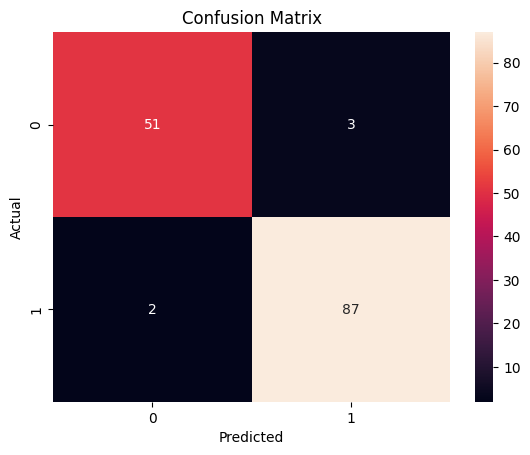

In [9]:
#35. Train a Random Forest Classifier and visualize the confusion matrix.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset for classification (if not already loaded)
try:
    X_clf, y_clf = X_clf, y_clf
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = X_train_clf, X_test_clf, y_train_clf, y_test_clf
except NameError:
    X_clf, y_clf = load_breast_cancer(return_X_y=True)
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, random_state=42)


# Ensure clf is trained on the correct data if it's not already defined or was trained on different data
try:
    clf
except NameError:
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_clf, y_train_clf)


cm = confusion_matrix(y_test_clf, clf.predict(X_test_clf))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
#36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset for classification (if not already loaded)
try:
    X_clf, y_clf = X_clf, y_clf
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = X_train_clf, X_test_clf, y_train_clf, y_test_clf
except NameError:
    X_clf, y_clf = load_breast_cancer(return_X_y=True)
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, random_state=42)


base_models = [
    ('tree', DecisionTreeClassifier()),
    ('svm', SVC(probability=True, random_state=42)) # Added random_state for reproducibility
]
stack_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(random_state=42)) # Added random_state for reproducibility
stack_model.fit(X_train_clf, y_train_clf)
print("Stacking Classifier Accuracy:", stack_model.score(X_test_clf, y_test_clf))

Stacking Classifier Accuracy: 0.972027972027972


In [12]:
#37. Train a Random Forest Classifier and print the top 5 most important features.

import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Top 5 Important Features:")
for i in range(5):
    print(f"Feature {indices[i]}: {importances[indices[i]]:.4f}")



Top 5 Important Features:
Feature 27: 0.1723
Feature 23: 0.1232
Feature 7: 0.0903
Feature 6: 0.0832
Feature 20: 0.0813


In [14]:
#38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

from sklearn.metrics import classification_report

y_pred = bag.predict(X_test_clf)
print(classification_report(y_test_clf, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [16]:
#39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset for classification
X_clf, y_clf = load_breast_cancer(return_X_y=True)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, random_state=42)

depths = [2, 4, 6, 8, 10, None]
for depth in depths:
    model = RandomForestClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_clf, y_train_clf)
    acc = model.score(X_test_clf, y_test_clf)
    print(f"max_depth={depth}: Accuracy={acc:.4f}")

max_depth=2: Accuracy=0.9650
max_depth=4: Accuracy=0.9650
max_depth=6: Accuracy=0.9650
max_depth=8: Accuracy=0.9650
max_depth=10: Accuracy=0.9650
max_depth=None: Accuracy=0.9650


In [17]:
#40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.

from sklearn.neighbors import KNeighborsRegressor

for estimator in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    model = BaggingRegressor(estimator=estimator, n_estimators=50, random_state=42)
    model.fit(X_train, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test))
    print(f"Base Estimator: {type(estimator).__name__}, MSE: {mse:.4f}")


Base Estimator: DecisionTreeRegressor, MSE: 6952.0004
Base Estimator: KNeighborsRegressor, MSE: 8643.6632


In [19]:
#41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

from sklearn.metrics import roc_auc_score

proba = clf.predict_proba(X_test_clf)[:, 1]
auc = roc_auc_score(y_test_clf, proba)
print("ROC AUC Score:", auc)

ROC AUC Score: 0.9962546816479401


In [21]:
#42. Train a Bagging Classifier and evaluate its performance using cross-validation.

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset for classification
X_clf, y_clf = load_breast_cancer(return_X_y=True)

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

scores = cross_val_score(bag, X_clf, y_clf, cv=5)
print("Cross-validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-validation Scores: [0.9122807  0.92105263 0.98245614 0.95614035 1.        ]
Mean Accuracy: 0.9543859649122808


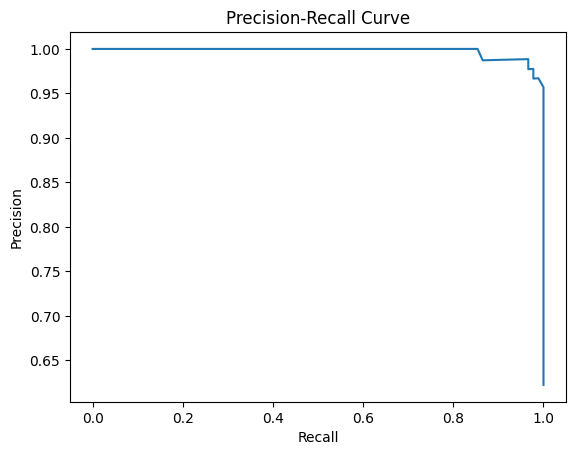

In [23]:
#43. Train a Random Forest Classifier and plot the Precision-Recall curve.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset for classification (if not already loaded)
try:
    X_clf, y_clf = X_clf, y_clf
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = X_train_clf, X_test_clf, y_train_clf, y_test_clf
except NameError:
    X_clf, y_clf = load_breast_cancer(return_X_y=True)
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, random_state=42)


# Ensure clf is trained on the correct data if it's not already defined or was trained on different data
try:
    clf
except NameError:
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_clf, y_train_clf)

precision, recall, _ = precision_recall_curve(y_test_clf, clf.predict_proba(X_test_clf)[:, 1])
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [27]:
#44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split # Corrected import

# Load the Breast Cancer dataset for classification (if not already loaded)
try:
    X_clf, y_clf = X_clf, y_clf
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = X_train_clf, X_test_clf, y_train_clf, y_test_clf
except NameError:
    X_clf, y_clf = load_breast_cancer(return_X_y=True)
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, random_state=42)


stack2 = StackingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=42)), # Added random_state for reproducibility
    ('logreg', LogisticRegression(max_iter=1000, random_state=42)) # Added random_state for reproducibility
], final_estimator=LogisticRegression(random_state=42)) # Added random_state for reproducibility
stack2.fit(X_train_clf, y_train_clf) # Use classification data
print("Stacking Classifier Accuracy:", stack2.score(X_test_clf, y_test_clf)) # Use classification data

In [28]:
#45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

for sample_frac in [0.5, 0.7, 1.0]:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50,
                             max_samples=sample_frac, random_state=42)
    model.fit(X_train, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test))
    print(f"Max Samples: {sample_frac}, MSE: {mse:.4f}")


Max Samples: 0.5, MSE: 7976.2794
Max Samples: 0.7, MSE: 7404.7630
Max Samples: 1.0, MSE: 6952.0004
